In [74]:
import cv2
from matplotlib import pyplot as plt

In [75]:
img = cv2.imread("docs/solidWhiteRight.jpg")
img  = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)

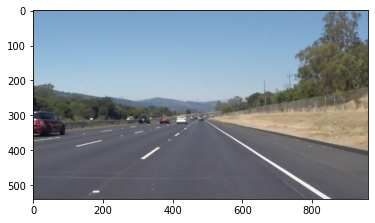

In [76]:
plt.imshow(img)

In [77]:
img.shape # make the shape for all images

(540, 960, 3)

## color selection

Text(0.5, 1.0, 'out')

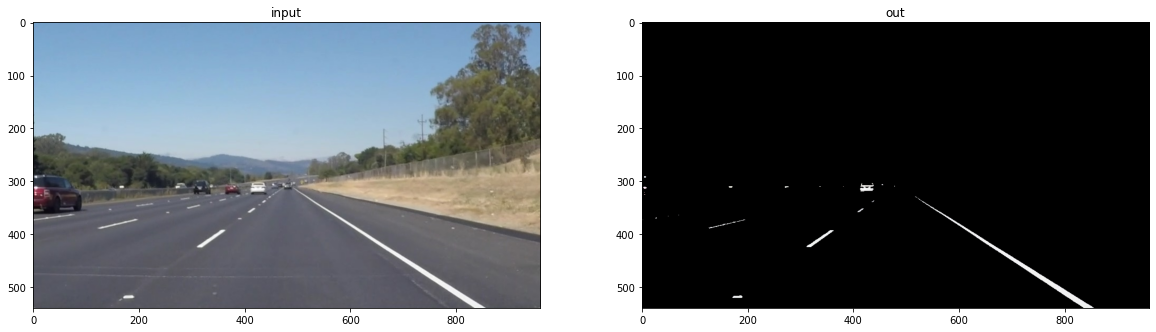

In [78]:
out = img.copy()
threshold = (out[:, :, 0] < 200) | (out[:, :, 1] < 200) | (out[:, :, 2] < 200) # boolen true for (not white)
#print(threshold)

out[threshold] = [0, 0, 0]

plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(img)
plt.title("input")

plt.subplot(1,2,2)
plt.imshow(out)
plt.title("out")


## Grayscale

(540, 960)

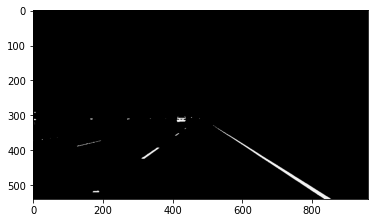

In [79]:
gray = cv2.cvtColor(out , cv2.COLOR_RGB2GRAY)
plt.imshow(gray , cmap="gray")
gray.shape 

## Gaussian blur

(540, 960)

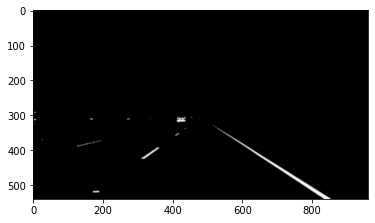

In [80]:
blur = cv2.GaussianBlur(gray ,(5,5),0)
plt.imshow(blur , cmap="gray")
blur.shape

## Canny edge detector

Text(0.5, 1.0, 'canny')

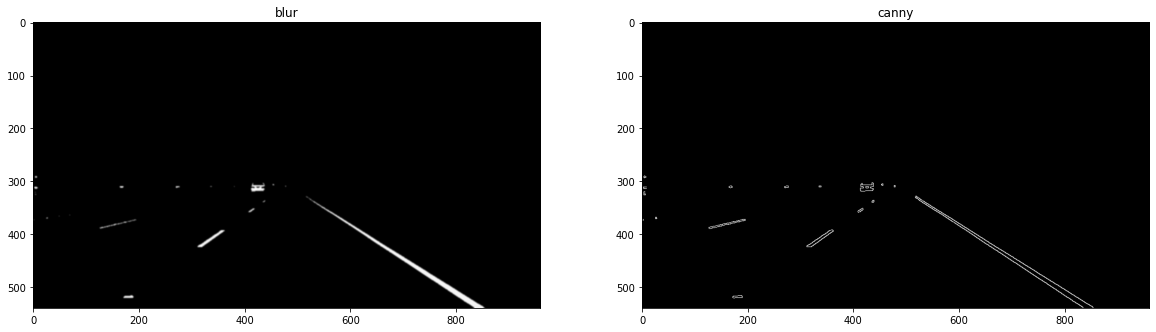

In [81]:
import numpy as np
sigma = 0.23
med = np.median(blur)
Lower = int(max(0, (1.0 - sigma) * med))
Upper = int(min(255, (1.0 + sigma) * med))
#cc = cv2.Canny(blur, Lower, Upper)

cc = cv2.Canny(blur, 50, 150)

plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(blur, cmap="gray")
plt.title("blur")

plt.subplot(1,2,2)
plt.imshow(cc, cmap="gray")
plt.title("canny")

## focused region

height 540, width 960


Text(0.5, 1.0, 'edges')

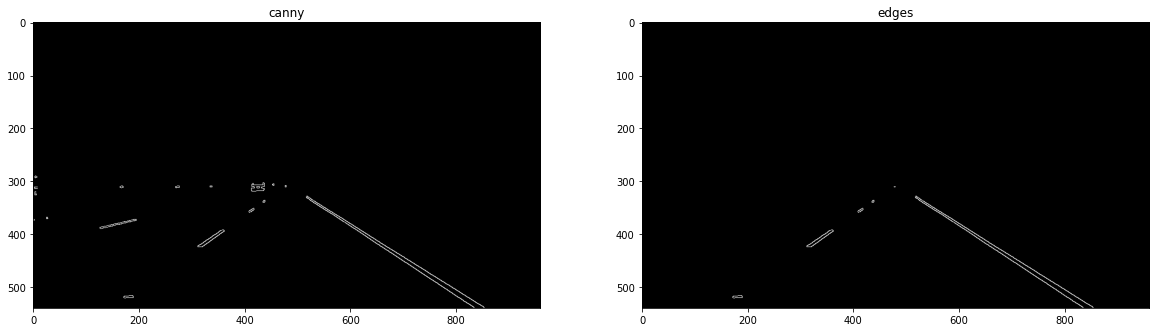

In [101]:
height, width = cc.shape
print("height %d, width %d" % (height, width))

def focus_region(cc, vertices):
    mask = np.zeros_like(cc)
    #print(mask.shape)
    if len(cc.shape) > 2:
        ignore_mask_color = (255,) * img.shape[2]
    else:
        ignore_mask_color = 255
    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    masked_image = cv2.bitwise_and(cc, mask)
    return masked_image


vertices = np.array([[(50, height),(450, 310),(490, 310),(width - 50, height)]], dtype=np.int32)
edges = focus_region(cc , vertices)

plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(cc, cmap="gray")
plt.title("canny")

plt.subplot(1,2,2)
plt.imshow(edges, cmap="gray")
plt.title("edges")


## Hough transform